In [ ]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH=r"/content/gdrive/MyDrive/bioinformatics_final_project-main/"

In [ ]:
df = pd.read_csv(PATH +'data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5658,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,10500.0,4.978811
5659,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,1220.0,5.913640
5660,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,1450.0,5.838632
5661,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,28980.0,4.537902


# Canonical_smiles To secuence

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [ ]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [ ]:
X = df['canonical_smiles']
y = df['pIC50']

In [ ]:
y_st_value=df['standard_value']
print (max(y), min(y))
print (max(y_st_value), min(y_st_value))

14.30102999566398 -6.77
5888436553555884.0 5e-06


**Implementar tokenización y guardar en X_seq_pad el dataset tokenizado**

In [ ]:
tokenizer =Tokenizer(filters='', lower=False, char_level=True)
tokenizer.fit_on_texts(X)

word_index =tokenizer.word_index

X_seq=tokenizer.texts_to_sequences(X)
max_len = max([len(x) for x in X_seq])

pad_type ='pre'
X_seq_pad =pad_sequences(X_seq,padding=pad_type,maxlen=max_len)
X_seq_pad= np.array (X_seq_pad)



In [ ]:
print("Word Index:\n", word_index)

Word Index:
 {'c': 1, 'C': 2, '(': 3, ')': 4, '1': 5, 'O': 6, '2': 7, 'N': 8, '=': 9, '3': 10, '[': 11, ']': 12, 'n': 13, '@': 14, '4': 15, 'H': 16, '-': 17, '/': 18, 'l': 19, '.': 20, '+': 21, 'F': 22, '5': 23, 'o': 24, 'B': 25, 'r': 26, 'S': 27, '\\': 28, '#': 29, 's': 30, '6': 31, 'I': 32, 'e': 33, 'P': 34, '7': 35, '8': 36, 'i': 37, 'a': 38}


In [ ]:
print("\nPadded Training Sequences:\n", X_seq_pad)


Padded Training Sequences:
 [[ 0  0  0 ...  4 24  5]
 [ 0  0  0 ...  2  2  5]
 [ 0  0  0 ...  1  1  5]
 ...
 [ 0  0  0 ...  5  6  2]
 [ 0  0  0 ...  1  5  6]
 [ 0  0  0 ...  7  9  6]]


In [ ]:
print("\nPadded Training Shape:\n", X_seq_pad.shape)


Padded Training Shape:
 (5663, 207)


In [ ]:
print("Training sequences Data type", type(X_seq))

Training sequences Data type <class 'list'>


In [ ]:
print("Padded training sequences Data type", type(X_seq_pad))


Padded training sequences Data type <class 'numpy.ndarray'>


In [ ]:
print(X_seq_pad[max_len_idx])
print(X_seq_pad[min_len_idx])

[ 2 11  2 14 14 12  5  7  2  2 11  2 14 16 12 10 11  2 14 12 15  3  2  4
  2  2  2 11  2 14 14 12 23  3  2  4  2  3  9  6  4  6  2  2 11  8 21 12
  3  2  4  3  2  4  2  2  2  2  2  2  2  2  2 11  8 21 12  3  2  4  3  2
  4  2  2  6  2  3  9  6  4 11  2 14 12 31  3  2  4  2  2  2 11  2 14 12
 35  3  2  4 11  2 14 14 16 12 31  2  2 11  2 14 14 12 31 36  2 11  2 14
 14 16 12  3  6  2  3  9  6  4  2  2  2  2  2  2  2  2  2  3  9  6  4  6
 11  2 14 14 16 12  5  2 11  2 14 14 12 10  3  2  2 11  2 14 14 16 12 15
 23  4  2  7  4 11  2 14 14 12  3  2  4  3  2  2 11  2 14 14 16 12 35 31
  4  2 36 20 11 25 26 17 12 20 11 25 26 17 12]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test)

(4530, 4530, 1133)

## Aplicación de Data Augmentation

Pruebo como cambian los resultados aplicando Data Aumentation

In [ ]:
X_train=np.vstack([X_train, X_train[:, ::-1]])

In [ ]:
X_train.shape

(9060, 207)

In [ ]:
y_train=np.hstack([y_train, y_train])

In [ ]:
y_train.shape

(9060,)

# Network Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [ ]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
#Completar largo del vocabulario
vocab_size =len (word_index)
print(vocab_size)

38


In [ ]:
max_sequence_len = X_seq_pad.shape[1]
print(max_sequence_len)

207


# Armar modelo en keras de LSTM


Se probaron distintas opciones de cantidad de embedding y capas densas con y sin batchnormalization y distintos valores de dropout para las siguientes arquitecturas:

In [ ]:
# Modelo 1
cells =100
return_sequences =False
model = Sequential()
model.add(Embedding(vocab_size + 1, 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells,return_sequences=return_sequences, activation='tanh')))
model.add(Dense(50))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 207, 64)           2496      
                                                                 
 bidirectional_10 (Bidirecti  (None, 200)              132000    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 50)                10050     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 activation_10 (Activation)  (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                     

In [ ]:
# Modelo 2
cells =100
return_sequences =False
model =Sequential()
model.add(Embedding (vocab_size+1,64,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(cells, return_state=False, return_sequences=return_sequences, activation='tanh')))
model.add(Dense (50, activation='linear'))
model.add(Dropout(0.8))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 207, 64)           2496      
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              132000    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 activation_2 (Activation)   (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [ ]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/100
71/71 [==============================] - 2s 30ms/step - loss: 0.9378 - R2: 0.6370 - val_loss: 1.1192 - val_R2: 0.6166
Epoch 2/100
71/71 [==============================] - 2s 29ms/step - loss: 0.9084 - R2: 0.6517 - val_loss: 1.0169 - val_R2: 0.6519
Epoch 3/100
71/71 [==============================] - 2s 28ms/step - loss: 0.8957 - R2: 0.6524 - val_loss: 1.0472 - val_R2: 0.6410
Epoch 4/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8715 - R2: 0.6656 - val_loss: 1.0733 - val_R2: 0.6341
Epoch 5/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8972 - R2: 0.6549 - val_loss: 1.0422 - val_R2: 0.6456
Epoch 6/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8791 - R2: 0.6601 - val_loss: 1.0006 - val_R2: 0.6575
Epoch 7/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8403 - R2: 0.6756 - val_loss: 1.1081 - val_R2: 0.6282
Epoch 8/100
71/71 [==============================] - 2s 29ms/step - loss: 0.8719 - R2: 0.6

In [ ]:
y_pred = model.predict(X_test)

# Score

In [ ]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6848449016614304

In [ ]:
model.save(PATH+'models/embed_64_bi_lstm_100_dense_50_bn_F.h5', )

¿Hasta que valores de R2 se logró?

Con data Augmentation

embed_64_bi_lstm_100_dense_50_bn: 0.6848449016614304 

embed_38_bi_lstm_100_dense_50_bn: 0.5564462304826786

embed_38_bi_lstm_100_dense_25_bn: 0.5564462304826786

embed_16_bi_lstm_100_dense_50_bn: 0.6246738356181719

embed_2_bi_lstm_100_dense_50_bn: 0.1481281219917423

embed_2_bi_lstm_100_dense_25_bn: 0.30475971100701005

embed_2_bi_lstm_100_dense_10_bn: 0.11916626543188824

embed_2_bi_lstm_100_dense_110_bn: 0.4470264542463902


Sin Data Augmentation

embed_64_bi_lstm_100_dense_50_bn_sdam: 0.5167953285564915

Al tener 38 caracteres probamos de bajar a 2 el embedding y al graficarlo podemos ver que componentes están cerca. Aunque esto tiene sentido cuando la tokenizacion es por componente químico y no por caracter
Probamos la mitad 16,8 y 2 para obligar que la clusterización quede en el embedding pero obtuvimos peores resultados en términos de R2.

Se probaron ademas distintos valore de capa densa y diferentes valores de dropout.

#Mejor Modelo:

Lo obtuvimos con embedding 64, bidirectional LSTM 100 cells,  capa densa de 50 y dropout de 0.8, con data augmentation obteniendo un R2 de 0.6848449016614304

# Load model (solo si se grabo el mejor modelo)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_loaded = load_model(PATH+'models/embed_64_bi_lstm_100_dense_50_bn_F.h5', custom_objects={'R2': R2})

In [ ]:
y_pred = model_loaded.predict(X_test)

In [ ]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6848449016614304

# Evaluación

<function matplotlib.pyplot.show>

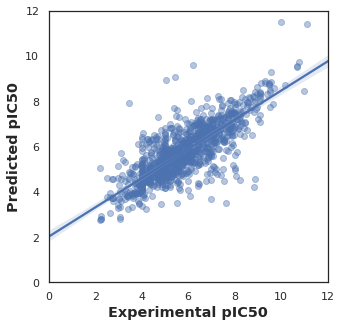

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

Aca se observa la relacion lineal.

### TSNE

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [ ]:
embedings= model.layers[0].get_weights()[0][1:]

In [ ]:
tsne=TSNE()
X_2D= tsne.fit_transform (embedings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


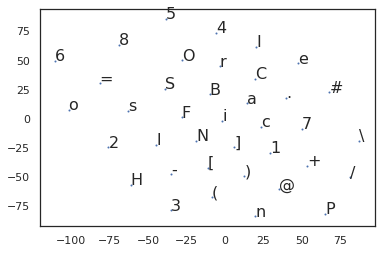

In [ ]:
plt.scatter(X_2D[:,0],X_2D[:,1],s=1)
for i , t in enumerate(word_index):
    plt.text(X_2D[i,0],X_2D[i,1], t, fontsize=16)

Aca como quedan uniformemente distribuidos sin agrupaciones claras.